<a href="https://colab.research.google.com/github/NeuralFlux/dl-mini-project/blob/main/Mini_Project_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dataset

In [1]:
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
sample_data = CIFAR10('./', download=True)


means = sample_data.data.mean(axis=(0, 1, 2)) / 255
stds = sample_data.data.std(axis=(0, 1, 2)) / 255

100%|██████████| 170498071/170498071 [00:01<00:00, 105202765.23it/s]


Extracting ./cifar-10-python.tar.gz to ./


In [3]:
# Creating the transforms to augment the dataset

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((36, 36)),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomApply(  
        [
            transforms.ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5),
                                   saturation=(0.5, 1.5), hue=(-0.5, 0.5)),
        ],
        p=0.5
    ),
    transforms.ToTensor(),
    transforms.Normalize(means, stds)
  ])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(means, stds)
])

In [4]:
# Loading the data
dataset = CIFAR10(root='data/', download=True, transform=transform_train)
test_dataset = CIFAR10(root='data/', train=False, transform=transform_test)

100%|██████████| 170498071/170498071 [00:02<00:00, 79788939.91it/s]


Extracting data/cifar-10-python.tar.gz to data/


In [8]:
image, label = dataset[0]

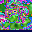

In [9]:
image = transforms.ToPILImage()(image)

image.show(title=f'Original Image (Label: {label})')